Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Yiyu Gan"
COLLABORATORS = ""

---

# Problem description

To a large degree, financial data has traditionally been numeric in format.

But in recent years, non-numeric formats like image, text and audio have been introduced.  

Private companies have satellites orbiting the Earth taking photos and offering them to customers.  A financial analyst might be able to extract information from these photos that could aid in the prediction of the future price of a stock

- Approximate number of customers visiting each store: count number of cars in parking lot
- Approximate activity in a factory by counting number of supplier trucks arriving and number of delivery trucks leaving
- Approximate demand for a commodity at each location: count cargo ships traveling between ports

In this assignment, we will attempt to recognize ships in satellite photos.
This would be a first step toward
counting.

As in any other domain: specific knowledge of the problem area will make you a better analyst.
For this assignment, we will ignore domain-specific information and just try to use a labeled training set (photo plus a binary indicator for whether a ship is present/absent in the photo), assuming that the labels are perfect.



## Goal: 

In this notebook, you will need to create a model in `sklearn` to classify satellite photos.
- The features are images: 3 dimensional collection of pixels
  - 2 spatial dimensions
  - 1 dimension with 3 features for different parts of the color spectrum: Red, Green, Blue
- The labels are either 1 (ship is present) or 0 (ship is not present)


## Learning objectives
- Learn how to implement a model to solve a Classification task


# Imports modules

In [2]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline

In [3]:
## Load the helper module
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%reload_ext autoreload
%autoreload 1

# Import nn_helper module
import helper
%aimport helper

helper = helper.Helper()

# API for students

We have defined some utility routines in a file `helper.py`. There is a class named `Helper` in it.  

This will simplify problem solving

More importantly: it adds structure to your submission so that it may be easily graded

`helper = helper.Helper()`

- getData: Get a collection of labeled images, used as follows

  >`data, labels = helper.getData()`
- showData: Visualize labelled images, used as follows

  >`helper.showData(data, labels)`
- model_interpretation: Visualize the model parameters
  
  >`helper.model_interpretation(Classifier)`

# Get the data

The first step in our Recipe is Get the Data.

We have provided a utility method `getData` to simplify this for you

In [4]:
# Get the data
data, labels = helper.getData()
n_samples, width, height, channel = data.shape

print("Data shape: ", data.shape)
print("Labels shape: ", labels.shape)
print("Label values: ", np.unique(labels))


Data shape:  (4000, 80, 80, 3)
Labels shape:  (4000,)
Label values:  [0 1]


Your expected outputs should be following      
`Date shape: (4000, 80, 80, 3)`           
`Labels shape: (4000,)`       
`Label values: [0 1]`        

We will shuffle the examples before doing anything else.

This is usually a good idea
- Many datasets are naturally arranged in a *non-random* order, e.g., examples with the sample label grouped together
- You want to make sure that, when you split the examples into training and test examples, each split has a similar distribution of examples

In [5]:
# Shuffle the data first
data, labels = sklearn.utils.shuffle(data, labels, random_state=42)

## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

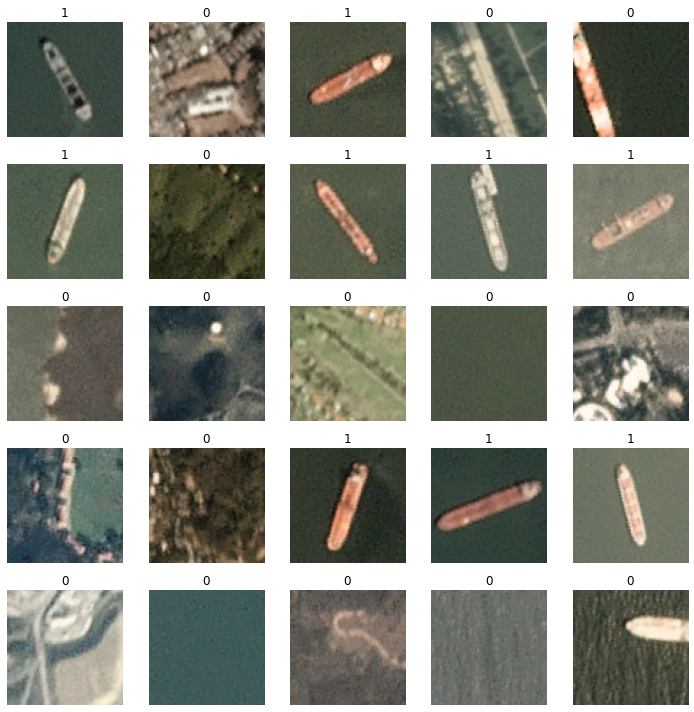

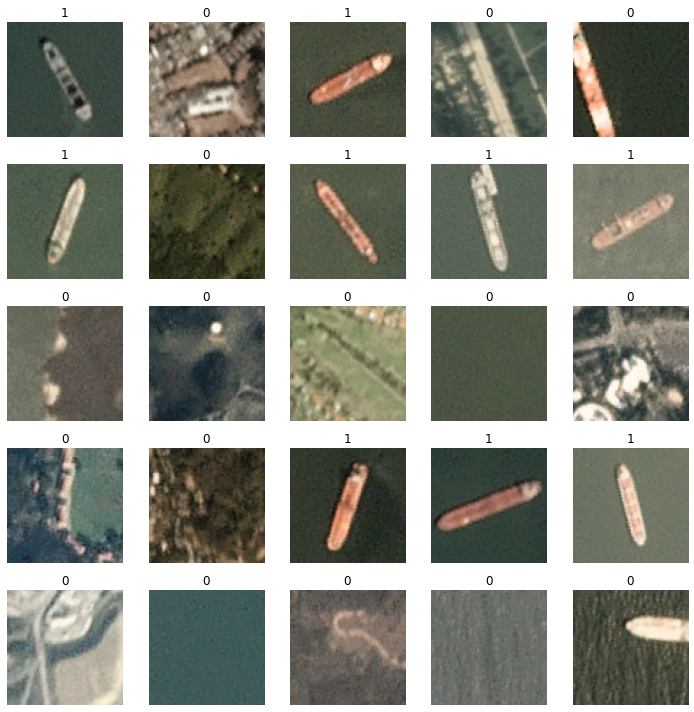

In [6]:
# Visualize the data samples
helper.showData(data[:25], labels[:25])

## Eliminate the color dimension

As a simplification, we will convert the image from color (RGB, with 3 "color" dimensions referred to as Red, Green and Blue) to gray scale.


In [7]:
print("Original shape of data: ", data.shape)

w = (.299, .587, .114)
data_bw = np.sum(data *w, axis=3)

print("New shape of data: ", data_bw.shape)

Original shape of data:  (4000, 80, 80, 3)
New shape of data:  (4000, 80, 80)


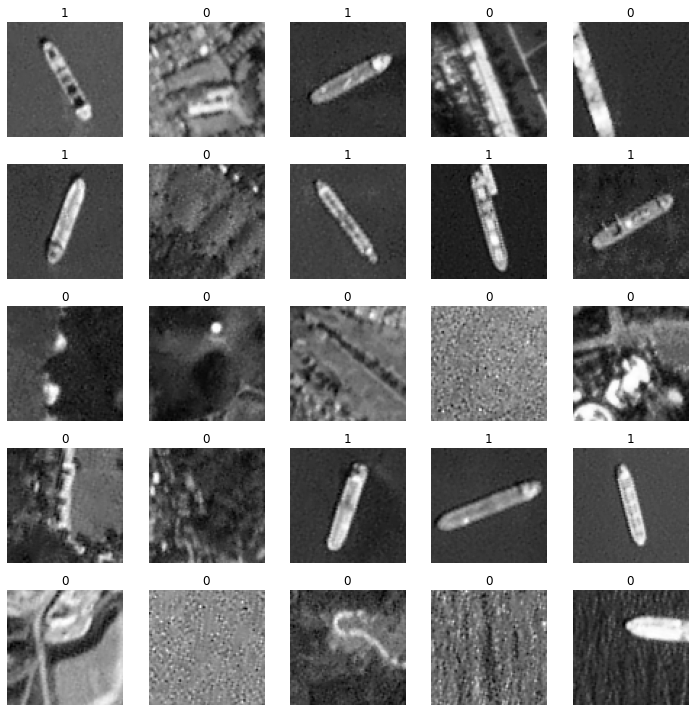

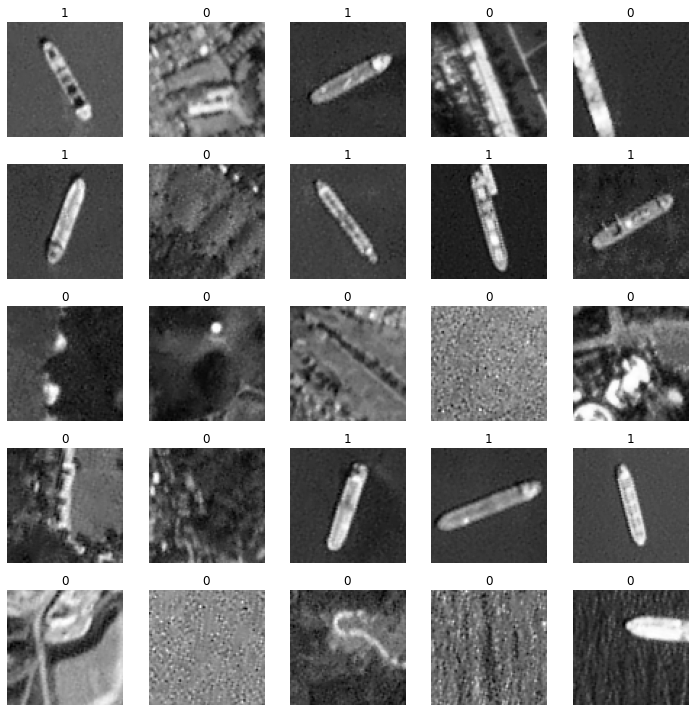

In [8]:
# Visualize the data samples
helper.showData(data_bw[:25], labels[:25], cmap="gray")

## Have  look at the data: Examine the image/label pairs

Rather than viewing the examples in random order, let's group them by label.

Perhaps we will learn something about the characteristics of images that contain ships.

We have loaded and shuffled our dataset, now we will take a look at image/label pairs. 

Feel free to explore the data using your own ideas and techniques.


<ipython-input-9-fc1c7f9321fa>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  _= fig.show()


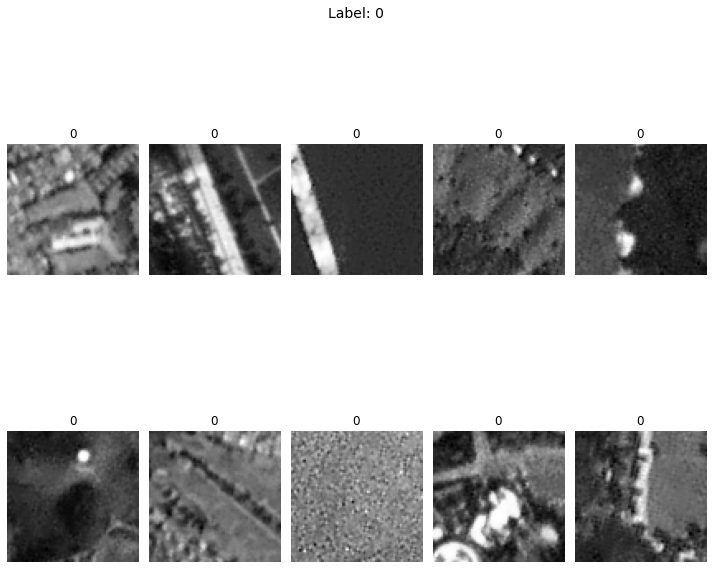

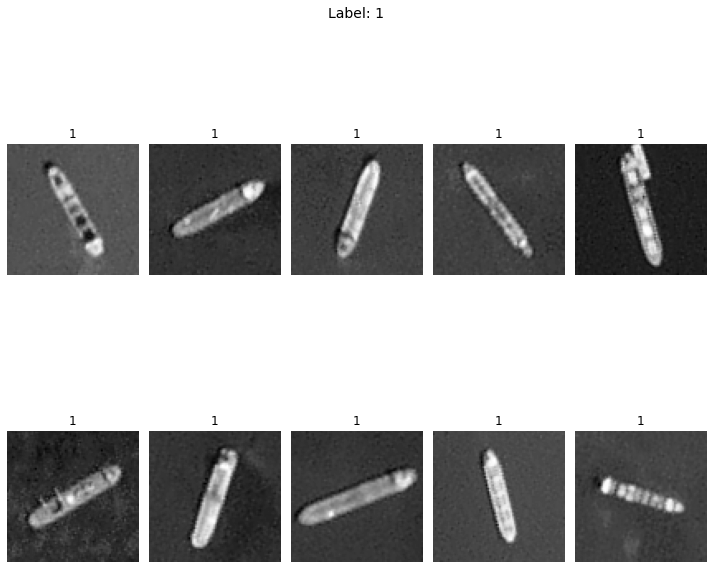

In [9]:
# Inspect some data (images)
num_each_label = 10

for lab in np.unique(labels):
    # Fetch images with different labels
    X_lab, y_lab = data_bw[ labels == lab ], labels[ labels == lab]
    # Display images
    fig = helper.showData( X_lab[:num_each_label], [ str(label) for label in y_lab[:num_each_label] ], cmap="gray")
    _= fig.suptitle("Label: "+  str(lab), fontsize=14)
    _= fig.show()
    print("\n\n")


It appears that a photo is labeled as having a ship present only if the ship is in the **center** of the photo. 

Perhaps this prevents us from double-counting.

In any event: we have learned something about the examples that may help us in building models
- Perhaps there is some feature engineering that we can perform to better enable classification

## Create a test set

To train and evaluate a model, we need to split the original dataset into
a training subset (in-sample) and a test subset (out of sample).

**Question:**

Split the data
- Set X_train, X_test, y_train and y_tests to match the description in the comment
- 90% will be used for training the model
- 10% will be used as validation (out of sample) examples

**Hint:**
- Use `train_test_split()` from `sklearn` to perform this split
    -  Set the `random_state` parameter of `train_test_split()` to be 42

We will help you by
- Assigning the feature vectors to X and the labels to y
- Flattening the two dimensional spatial dimensions of the features to a single dimension

In [10]:
from sklearn.model_selection import train_test_split

y = labels
X = data_bw

X_train = None
X_test = None
y_train = None
y_test = None

### Flatten X
X = X.reshape(X.shape[0], -1)

# Split data into train and test
# Create variables X_train, X_test, y_train, y_test
#   X_train: training examples
#   y_train: labels of the training examples
#   X_test:  test examples
#   y_test:  labels of test examples

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3600, 6400)
X_test shape:  (400, 6400)
y_train shape:  (3600,)
y_test shape:  (400,)


Your expected outputs should be following        
`X_train shape:  (3600, 6400)`      
`X_test shape:  (400, 6400)`      
`y_train shape:  (3600,)`       
`y_test shape:  (400,)`      


# Prepare the data and Classifier

**Questions:**

You will transform the data and create a Classifier.

The requirements are as follows:

- Transform the features (i.e., the pixel grids) into standardized values (mean 0, unit standard deviation)
    - Set a variable `scaler` to be your scaler
- Create an `sklearn` Classifier
    - Set variable `clf` to be be your Classifier object
    - We recommend trying Logistic Regression first
        - `sklearn`'s implementation of Logistic Regression has many parameter choices
        - We recommend starting with the single parameter `solver="liblinear"`
        - You may want to use the `sklearn` manual to learn about the other parameters

**Hints:**

- Look up `StandardScaler` in `sklearn`; this is a transformation to create standardized values
- You will use transformed examples both for training and test examples
    - So be sure that you can perform the transformation on both sets of examples
- Using `Pipeline` in `sklearn`, whose last element is a model, is a very convenient way to
    - Implement transformations and perform model fitting/prediction
    - In a way that ensures that all examples, both training and test, are treated consistently
    - Enables Cross Validation without cheating


In [11]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline


## Data Scaler
#  Create a StandardScaler object
#    scaler: sklearn standard scaler
scaler = None

# YOUR CODE HERE
scaler = StandardScaler()

## Classification Model
#  Create a classifier
#    clf: sklearn classifier
#    name: string, name of your classifier
#    model_pipeline: sklearn Pipeline, if you use pipeline, please use this variable
clf = None
name = None

# YOUR CODE HERE
clf = LogisticRegression(solver="liblinear")
name = 'LR_clf'
model_pipeline = Pipeline([('scaler', StandardScaler()), (name, clf)])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR_clf', LogisticRegression(solver='liblinear'))])

## Train model

**Question:**
- Use your Classifier or model pipeline to train your dataset and compute the in-sample accuracy
    - Set a variable `score_in_sample` to store the in-sample accuracy 

**Hint:**
- The `sklearn` function `accuracy_score` may be helpful


In [12]:
from sklearn.metrics import accuracy_score
# Set variable
# score_in_sample: a scalar number, score for your in-sample examples
score_in_sample = None

# YOUR CODE HERE
yhat = model_pipeline.predict(X_train)
score_in_sample = accuracy_score(y_train, yhat)

print("Model: {m:s} in sample score={s:3.2f}\n".format(m=name, s=score_in_sample))

Model: LR_clf in sample score=1.00



## Train the model using Cross Validation

Since we only have one test set, we want to use 5-fold cross validation check model performance.

**Question:**
- Use 5-fold Cross Validation
    - Set `cross_val_scores` as your scores of k-fold results
    - Set `k` as the number of folds
    - Report the average score


**Hint:**
- `cross_val_score` in `sklearn` will be useful


In [13]:
# Set variable 
#  scores: an array of scores (length 5), one for each fold that is out-of-sample during cross-validation
#  k: number of folds
cross_val_scores = None
k = 5

t0 = time.time()

# YOUR CODE HERE
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=k)

print("Model: {m:s} avg cross validation score={s:3.2f}\n".format(m=name, s=cross_val_scores.mean()) )

Model: LR_clf avg cross validation score=0.86



# How many parameters in the model ?

**Question:** 

- Calculate the number of parameters in your model. Report only the number of *non-intercept* parameters. 
   - Set `num_parameters` to store the number of parameters

**Hint:** 

- The model object may have a method to help you ! Remember that Jupyter can help you find the methods that an object implements.


In [14]:
# Set num_parameters equal to the number of non-intercept parameters in the model
num_parameters = None

# YOUR CODE HERE
num_parameters = clf.coef_.shape

print("\nShape of intercept: {i}; shape of coefficients: {c}".format(i=clf.intercept_.shape,
                                                                   c=num_parameters) )


Shape of intercept: (1,); shape of coefficients: (1, 6400)


# Evaluate the model

**Question:**

We have trained our model. We now need to  evaluate the model using the test dataset created in an earlier cell.

Please store the model accuracy on the test set in a variable named `score_out_of_sample`.   

**Hint:**
- If you have transformed examples for training, you must perform the same transformation for test examples !

- Remember: you *fit* the transformations only on the training examples, not on the test examples !

In [15]:
# Set variable to store the model accuracy on the test set
score_out_of_sample = None

# YOUR CODE HERE
score_out_of_sample = accuracy_score(y_test, model_pipeline.predict(X_test))

print("Model: {m:s} out-of-sample score={s:3.2f}\n".format(m=name, s=score_out_of_sample))

Model: LR_clf out-of-sample score=0.85



# Visualize the parameters

Remember: there is a one-to-one association between parameters and input features (pixels).

So we can arrange the parameters into the same two dimensional grid structure as images.

This might tell us what "pattern" of features the model is trying to match.

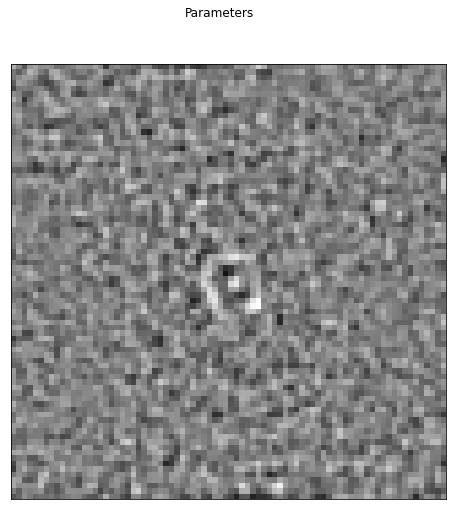

In [16]:
helper.model_interpretation(clf)

# Further Exploration (Optional)
Now you can build your own model using what you have learned from the course. Some ideas to try:
- Was it a good idea to drop the "color" dimension by converting the 3 color channels to a single one ?
- Can you interpret the coefficients of the model ?  Is there a discernible "pattern" being matched ?
- Feature engineering !
    - Come up with some ideas for features that may be predictive, e.g, patterns of pixels
    - Test them
- Use Error Analysis to guide your feature engineering
- Add a *regularization penalty* to your loss function
    - How does this affect
        - The in-sample fit ?
        - The visualization of the parameters
    - **Hint**: The `sklearn` `LogisticRegression` model
        - has several choices for the `penalty` parameter
        - has a variable value for the regularization strength parameter `C`

Observe the effect of each change on the Loss and Accuracy.


## Get the Data

In [17]:
# Get the data
data, labels = helper.getData()
n_samples, width, height, channel = data.shape

print("Data shape: ", data.shape)
print("Labels shape: ", labels.shape)
print("Label values: ", np.unique(labels))

Data shape:  (4000, 80, 80, 3)
Labels shape:  (4000,)
Label values:  [0 1]


In [18]:
data, labels = sklearn.utils.shuffle(data, labels, random_state=42)

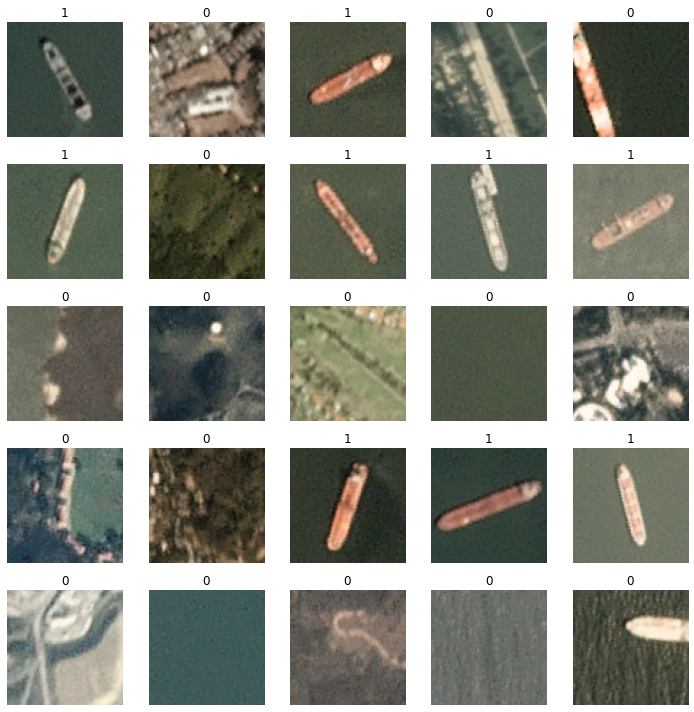

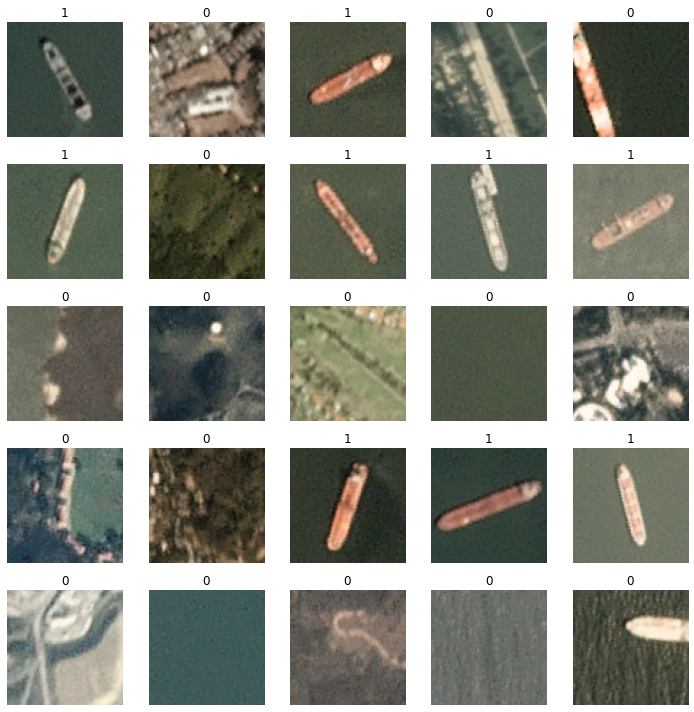

In [19]:
# Have a look
helper.showData(data[:25], labels[:25])

From the figures shown above, we could find that most ships are in color red or white. The color of ships could be considered as a feature to classify if there is a ship in the picture. But ships could have multiple colors, white ships could even be similar to the road's color, we will still drop the color dimension in order to simplify the problem. The coefficients of the model are the pixels of each sample, which is 80x80.

In [20]:
print("Original shape of data: ", data.shape)

w = (.299, .587, .114)
data_bw = np.sum(data *w, axis=3)

print("New shape of data: ", data_bw.shape)

Original shape of data:  (4000, 80, 80, 3)
New shape of data:  (4000, 80, 80)


<ipython-input-21-fc1c7f9321fa>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  _= fig.show()


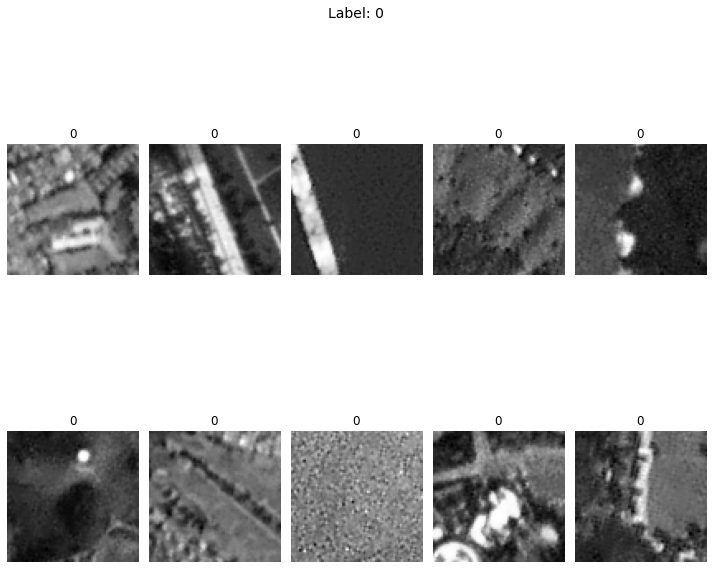

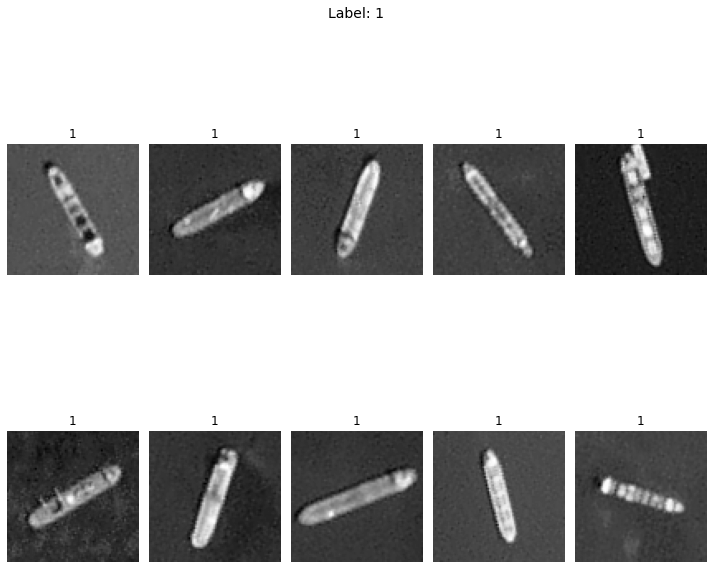

In [21]:
# Inspect some data (images)
num_each_label = 10

for lab in np.unique(labels):
    # Fetch images with different labels
    X_lab, y_lab = data_bw[ labels == lab ], labels[ labels == lab]
    # Display images
    fig = helper.showData( X_lab[:num_each_label], [ str(label) for label in y_lab[:num_each_label] ], cmap="gray")
    _= fig.suptitle("Label: "+  str(lab), fontsize=14)
    _= fig.show()
    print("\n\n")

We could try to use **edge detection** to process the images and to see if this method performs better than the method above.

First, we will transform the data from `data_dw` to `data_grad` using the function **cv2.Canny**.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fe8cf69d8e0>)

(Text(0.5, 1.0, 'Original Image'), ([], []), ([], []))

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fe8cf816160>)

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

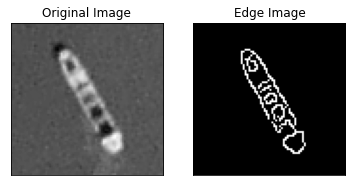

In [22]:
import cv2
from matplotlib import pyplot as plt

img = data_bw[0].astype(np.uint8)
edges = cv2.Canny(img, 100, 200)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

From the specific example shown above, we could find that **cv2.Canny** function works pretty well to show the edge of the image. And we will apply such transformation to all the elements in `data_bw` dataset.

In [23]:
import cv2
data_grad = np.sum(data *w, axis=3)
for i in range(4000):
    img = data_bw[i].astype(np.uint8)
    data_grad[i] = cv2.Canny(img, 100, 200)

In [24]:
# Create a test set
from sklearn.model_selection import train_test_split

y = labels
X = data_grad

X_train = None
X_test = None
y_train = None
y_test = None

### Flatten X
X = X.reshape(X.shape[0], -1)

# Split data into train and test
# Create variables X_train, X_test, y_train, y_test
#   X_train: training examples
#   y_train: labels of the training examples
#   X_test:  test examples
#   y_test:  labels of test examples

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3600, 6400)
X_test shape:  (400, 6400)
y_train shape:  (3600,)
y_test shape:  (400,)


## Exploratory Data Analysis

In [25]:
import pandas as pd
pd.DataFrame(labels).value_counts()

0    3000
1    1000
dtype: int64

From above, we can see that the ratio of image with ships and without ships is close to 3:1, which could be considered as imbalanced data.

In [26]:
pd.DataFrame(y_train).value_counts()

0    2687
1     913
dtype: int64

In [27]:
pd.DataFrame(y_test).value_counts()

0    313
1     87
dtype: int64

## Prepare the Data

Using the `cv2.Canny` function, we have prepared the data. We have transformed the orginal images into edge images, in order to train the logistic regression model with edge detection.

## Train a Model

In [28]:
LR_clf = LogisticRegression(solver='liblinear')
LR_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [29]:
yhat = LR_clf.predict(X_train)
score_in_sample = accuracy_score(y_train, yhat)

print("in-sample score: ", score_in_sample)
#print("Model: {m:s} in sample score={s:3.2f}\n".format(m=name, s=score_in_sample))

in-sample score:  1.0


We can see from the in-sample score that the model fits very well. But it does not mean the model will also work well for the out-of-sample data. Next, we will check its out-of-sample performance. First, we will use the k-fold cross vaidation method.

In [30]:
# Set variable 
#  scores: an array of scores (length 5), one for each fold that is out-of-sample during cross-validation
#  k: number of folds
k = 5
cross_val_scores = cross_val_score(LR_clf, X_train, y_train, cv=k)

print("avg cross validation score: ", cross_val_scores.mean())

avg cross validation score:  0.918611111111111


In [31]:
score_out_of_sample = accuracy_score(y_test, LR_clf.predict(X_test))

print("out-of-sample score: ", score_out_of_sample)

out-of-sample score:  0.925


From the **Error Analysis** above, we can see that both the **average cross validation score** and **out-of-sample score** are imporved by using edge detection to train the logistic regression model. This model performs better than directly using black-white image.

## Visualize the parameters

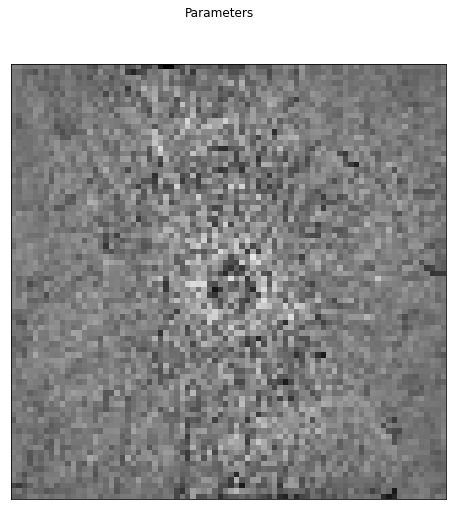

In [32]:
helper.model_interpretation(LR_clf)

## Add a regularization penalty to the loss function

There are 3 types of penalty in the logistic regression model, L1, L2, and elasticnet. And the c could be positive float numbers. Only Saga supports elasticnet penalty, so we will set the solver of Logistic Regression to `'Saga'`.

In [ ]:
l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization


# Set regularization parameter
for i, (C) in enumerate((1, 0.1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_en_LR = LogisticRegression(C=C, penalty='elasticnet', solver='saga',
                                   l1_ratio=l1_ratio, tol=0.01)
    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)
    clf_en_LR.fit(X_train, y_train)
    
    # In-sample score
    l1_score_in_sample = accuracy_score(y_train, clf_l1_LR.predict(X_train))
    l2_score_in_sample = accuracy_score(y_train, clf_l2_LR.predict(X_train))
    en_score_in_sample = accuracy_score(y_train, clf_en_LR.predict(X_train))
    
    # Out-of-sample score
    l1_score_out_of_sample = accuracy_score(y_test, clf_l1_LR.predict(X_test))
    l2_score_out_of_sample = accuracy_score(y_test, clf_l2_LR.predict(X_test))
    en_score_out_of_sample = accuracy_score(y_test, clf_en_LR.predict(X_test))

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("In-sample score with L1 penalty:", l1_score_in_sample))
    print("{:<40} {:.2f}%".format("In-sample score with L2 penalty:", l2_score_in_sample))
    print("{:<40} {:.2f}%".format("In-sample score with Elastic-Net penalty:", en_score_in_sample))
    print("{:<40} {:.2f}".format("Out-of-sample score with L1 penalty:",
                                 l1_score_out_of_sample))
    print("{:<40} {:.2f}".format("Out-of-sample score with  L2 penalty:",
                                 l2_score_out_of_sample))
    print("{:<40} {:.2f}".format("Out-of-sample score with Elastic-Net penalty:",
                                 en_score_out_of_sample))


LogisticRegression(C=1, penalty='l1', solver='saga', tol=0.01)

LogisticRegression(C=1, solver='saga', tol=0.01)

LogisticRegression(C=1, l1_ratio=0.5, penalty='elasticnet', solver='saga',
                   tol=0.01)

C=1.00
In-sample score with L1 penalty:         0.99%
In-sample score with L2 penalty:         0.99%
In-sample score with Elastic-Net penalty: 0.99%
Out-of-sample score with L1 penalty:     0.93
Out-of-sample score with  L2 penalty:    0.94
Out-of-sample score with Elastic-Net penalty: 0.93


LogisticRegression(C=0.1, penalty='l1', solver='saga', tol=0.01)

LogisticRegression(C=0.1, solver='saga', tol=0.01)

LogisticRegression(C=0.1, l1_ratio=0.5, penalty='elasticnet', solver='saga',
                   tol=0.01)

C=0.10
In-sample score with L1 penalty:         0.99%
In-sample score with L2 penalty:         0.99%
In-sample score with Elastic-Net penalty: 0.99%
Out-of-sample score with L1 penalty:     0.93
Out-of-sample score with  L2 penalty:    0.93
Out-of-sample score with Elastic-Net penalty: 0.93


**With same kind of penalty, larger value of C generates higher in-sample score, which means larger value of C will make the model have better in-sample performance, whereas smaller value of C performs better out of sample. With same value of C, L2 penalty has better performance in sample. However, it is hard to say which kind of penalty has the best out-of-sample performance.** 

In [ ]:
helper.model_interpretation(clf_l1_LR)

In [ ]:
helper.model_interpretation(clf_l2_LR)

In [ ]:
helper.model_interpretation(clf_en_LR)

## Conclusion

**We can also use edge detection to classify if there is a ship included in the image，which could improve model performace. Compared to baseline model, both average cross validation score and out-of-sample score are imporved, and the model generates a better prediction using edge detection. Larger value of C and L2 penalty performs better in sample, whereas smaller value of C performs better out of sample.**

In [ ]:
print("Done")